# **Fashion-MNIST with `CNN`(s)**

> Here, we will solve a very common Computer Vision project `Fashion MNIST` using `CNN`(Convolutional Neural Network).

'''

* `Fashion MNIST` is a `Image Classification` dataset with `28x28` grayscale images of `10` Fashion categories.
* Here, we will build a` Deep Learning model` using `Convolutional Neural Networks (CNNs)` to solve this Image Classification problem.

![Image](https://thiagolcmelo.github.io/assets/img/fashion-mnist.png)

***
***

### **Importing Libraries**

We will import some basic python libraires, such as:

* `Numpy` - a Python library used for working with arrays.
* `Pandas` - a Python library used for data analysis and manipulation.
* `Matplotlib` - a plotting library for the Python programming language and its numerical mathematics extension NumPy.
* Additionally, `%matplotlib inline` is a magic command in Jupyter Notebook that allows you to display plots in the notebook itself. It is used to set the backend of matplotlib to the inline backend.
* `Pyplot` - a module in the Matplotlib library which provides a convenient interface for creating plots and charts.
* `Tensorflow` - a free and open-source software library for machine learning and artificial intelligence.
* `Keras` - an open-source high-level neural network library, which is written in Python.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

### **Importing Dataset**

* Here we import Fashion MNIST dataset from `keras.datasets`.
* There are `60,000` Train images and labels and `10,000` for Test.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

* Also we will make a `list` of the `10 classes` (clothing categories). We will later use it to `predict` using our Model.

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

### **Reshaping Data**

* We will reshape our Train and Test Image dataset.
* `60,000` and `10,000` are the number of images for `Train` and `Test` respectively.
* `28,28` are the dimensions of the images in `pixels`.
* And since the images are in `grayscale`, they only need `1` colour channel.

In [4]:
X_train_full = X_train_full.reshape((60000, 28,28, 1))
X_test = X_test.reshape((10000, 28,28, 1))

### **Split the data into Train/ Validation/ Test Datasets**

* In the earlier step of importing the date, we had 60,000 datasets or Training and 10,000 Test datasets.
* Now we further split the Training data into Train/ Validation. Here is how each type of dataset is used in Deep Learning.

Use of each each type of Dataset in Deep Learning:-

* `Training Data` - used for Training model.
* `Validation Data` - used for tuning the Hyper-parameters and evaluate the Models.
* `Test Data` - used to test the Model after the Model has been trained.

'''

* We will take first `5000` images and labels  out of the `60,000` as `Validation` dataset, and the rest for the model to `Train` on.

In [5]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

### **Data Augmentation**

> `Data Augmentation` is a technique used in machine learning to `reduce overfitting` when training a machine learning model by training models on several `slightly-modified` copies of `existing data`.

'''

We will perform `Data Augmentation` on `Train` and `Validation` images using following Augmentation:-

* `rescale=1./255` - used to convert the pixels in range `[0,255]` to range `[0,1]`. This process is also called `Normalizing the Input`.
* `rotation_range=20` - used to `rotate` the image by `0 to 20 degrees`. This method of augmentation rotates the pixels of the image.
* `width_shift_range=0.2` - used to `shift` the image in the `horizontal` direction.
* `height_shift_range=0.2` - used to `shift` the image in the `vertical` direction.
* `shear_range=0.2` - used to apply `shear` transformation to the image. `Shear` is a transformation that `shifts the rows or columns` of an image or a video frame by gradually `increasing the offset` from left to right or right to left.
* `zoom_range=0.2` - used to apply `zoom` transformation to the image.
* `horizontal_flip=True` - used to `flip` the image `horizontally`.

In [6]:
from keras.preprocessing.image import ImageDataGenerator

# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
validation_generator = validation_datagen.flow(X_valid, y_valid, batch_size=32)

### **Model Architecture**

* Here we will build a `Convolutional Neural Network` using keras `Sequential API`.

In [7]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = keras.models.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding="valid", activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, padding="valid", activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=1, padding="valid", activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

#### **Architecture Explained**

**1.** `Conv2D [2D Convolutional Neural Network]` - There are `3 Conv2D` networks. Conv2D is designed to `learn features or patterns in an input image` by applying a set of `learnable filters` on the input image.

* `filters` - The filters argument sets the `number of convolutional filters` in that layer. These filters are `initialized to small-random values`. During network training, the filters are `updated` in a way that `minimizes the loss`. We `double` the `number of Filters` in every consecutive Conv2D Neural Network to `preserve the details` learned.

* `kernel_size` - The kernel_size parameter is a `2-tuple` specifying the `width and height` of the `2D convolution window`. The kernel_size must be an `odd integer` as well. Typical values for kernel_size include: (1,1), (3,3), (5,5), (7,7).

* `strides` - The strides parameter specifies the `strides of the convolution` along the `height and width`. The default value is (1,1) or 1.

* `padding` - Padding is to `preserve the spatial dimensions` of the input volume so that the `output volume size matches the input volume` size. When padding is set to `valid`, `no padding is used` and the `spatial dimensions` of the output volume are `reduced` after convolution.

* `activation` - An activation function is a `mathematical function` that is applied to the `output` of a neural network layer to introduce `nonlinearity` into the output which allows the neural network to `learn more complex functions and make better predictions`. `ReLU` (Rectified Linear Unit) is an activation function which is defined as `f(x) = max(0,x)`, where x is the input to the layer.

* `input_shape` - The first `Conv2D` neural network takes this as an argument to specify the `shape of each input image`.

**2.** `MaxPooling2D` - MaxPooling2D is a type of `pooling layer` that is used to `downsample` the spatial dimensions of the output volume after convolution while `preserving the most important features`.

* We have a pool size of `2x2`.
* This means that the `input volume` is divided into `non-overlapping 2x2 regions` and the maximum value within each region is taken.
* The output volume has `half` the spatial dimensions of the input volume.

**3.** `Flatten` - The Flatten layer is used to `convert` the `output` of a convolutional neural network `(CNN)` or a pooling layer into a `1D feature vector` that can be fed into a fully connected neural network (FCN). It works by `flattening` the spatial dimensions of the output volume into a single dimension while `preserving the channel dimension`.

**4.** `Dense` - The Dense layer is a `fully connected neural network layer` that is used to compute the output of a neural network.

* The `first` Dense layer has `512 neurons` with `Relu` as activation fuction.
* The `second` Dense layer acts as an `output layer` with `10 neurons` and `Softmax` as it's activation function.
* The `softmax` function is an activation function that is used to `convert the output` of a neural network into a `probability distribution over the output classes`. It works by exponentiating the output of the neural network and then `normalizing` it so that the `sum of the outputs is equal to 1`.

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

### **Callbacks**

* We will also use some `Callbacks` to improve our effectiveness and efficiency in training the Model.

> `Callbacks` are functions that can be passed to a neural network `during training` to perform certain `actions at specific points` during the `training` process.

* We will use following Callbacks -

1. `early_stopping` - The `EarlyStopping` callback is a Keras callback that can be used to `stop the training process early` if the monitored value stops improving. Here we monitor `val_loss` and use `10` as `patience` value, which means the callback will wait `10 epochs` before executing.
2. `model_checkpoint` - The `ModelCheckpoint` callback is a Keras callback that can be used to `save the weights` of the neural network at certain intervals during training. Here we will `save only best model`.
3. `reduce_lr_on_plateau` - ReduceLROnPlateau is a callback that `monitors a quantity` and if no improvement is seen for a patience number of epochs, the `learning rate is reduced`. Here we reduce the learning rate by `10 percent`.
4. `tensorboard` - TensorBoard is a `visualization tool` provided with TensorFlow. This callback `logs events` for TensorBoard, including metrics summary plots, training graph visualization, weight histograms, and sampled profiling.

In [9]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)
tensorboard = TensorBoard(log_dir='./logs')

callbacks = [early_stopping, model_checkpoint, reduce_lr_on_plateau, tensorboard]

### **Training Model**

* Building of every `batch` used into training uses random images.
* Before beginning to train, we will set `random seed number`, so that every time we train our model we get the `same results`.

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

We then compile our model using -

* `sparse_categorical_crossentropy` - We use this as our `loss` function as we are training a `Multi-Class Classification` model.
* `sgd` - `Stochastic Gradient Descent` (SGD) is an iterative method for `minimizing a function`, such as the loss or error function, by moving in the direction of the gradient. It is a type of `gradient descent` optimizer that uses a `randomly selected subset` of the data instead of the entire data set for each iteration.
* `accuracy` -  The metrics argument is used to specify the metrics to be `evaluated` by the model during `training and testing`. Here we use `accuracy`.

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

* Now we train our model.

In [12]:
history = model.fit(train_generator,
                    epochs=100,
                    steps_per_epoch=100,
                    validation_data=validation_generator,
                    validation_steps=50,
                    callbacks=callbacks)

Epoch 1/100
100/100 [==============================] - 13s 109ms/step - loss: 2.2945 - accuracy: 0.0997 - val_loss: 2.2803 - val_accuracy: 0.1063 - lr: 0.0100
Epoch 2/100
100/100 [==============================] - 9s 90ms/step - loss: 2.2815 - accuracy: 0.1509 - val_loss: 2.2627 - val_accuracy: 0.1469 - lr: 0.0100
Epoch 3/100
100/100 [==============================] - 8s 77ms/step - loss: 2.2665 - accuracy: 0.1928 - val_loss: 2.2354 - val_accuracy: 0.2575 - lr: 0.0100
Epoch 4/100
100/100 [==============================] - 6s 61ms/step - loss: 2.2339 - accuracy: 0.2275 - val_loss: 2.1733 - val_accuracy: 0.3456 - lr: 0.0100
Epoch 5/100
100/100 [==============================] - 6s 55ms/step - loss: 2.1655 - accuracy: 0.2447 - val_loss: 2.0279 - val_accuracy: 0.3531 - lr: 0.0100
Epoch 6/100
100/100 [==============================] - 5s 48ms/step - loss: 2.0264 - accuracy: 0.2650 - val_loss: 1.7915 - val_accuracy: 0.4269 - lr: 0.0100
Epoch 7/100
100/100 [==============================] - 6

### **Plotting Performance Graphs**

* Here we plot a performance graph showing our `Train` and `Validation` `loss` and `accurracy` along with the `learning rate`.

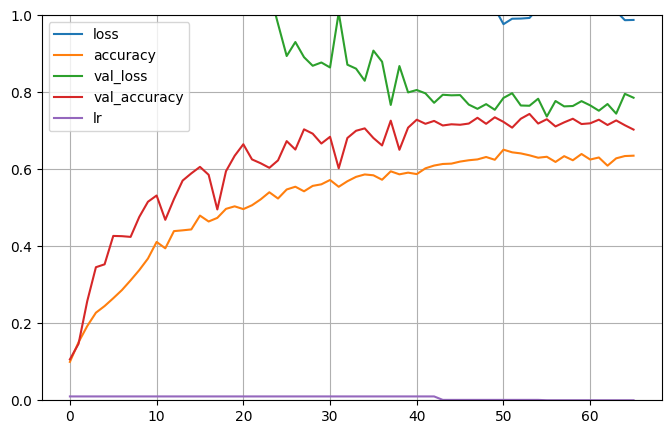

In [13]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### **Loading Best Model**

* We first use `clear_session` to free up our memory and then delete the model.

In [14]:
keras.backend.clear_session

<function keras.backend.clear_session()>

In [15]:
del model

* Now we load the `Best model` that our `callback` saved.

In [16]:
from keras.models import load_model

model = load_model('best_model.h5')

### **Evaluating Model**

* Here we evaluate the overall `performance` of our model on the `Test Dataset`.

In [17]:
result = model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 14ms/step - loss: 110.1562 - accuracy: 0.6693


In [18]:
result

[110.15623474121094, 0.6693000197410583]

### **Predicting Classes**

* Now we will `predict classes` using our model.
* First we take a small subset from our `Test Dataset`.

In [19]:
X_new = X_test[:3]

* The we use predict function using our model on the subset.

In [20]:
y_pred = model.predict(X_new) 

1/1 [==============================] - 0s 120ms/step


* Rounding off to 2 Decimal digits.

In [21]:
y_pred = np.round(y_pred, 2)

* Making an array of the position of the highest number present in each list.

In [22]:
y_pred = np.argmax(y_pred, axis=1)

print(y_pred)

[9 2 1]


* Now we see the values in our Test Subset.

In [23]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

* Our model predicted it accurately.

'''

* Let's Display the first image in our Subset.

AxesImage(size=(28, 28))


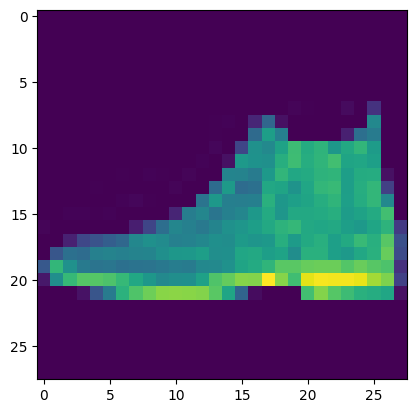

In [24]:
print(plt.imshow(X_test[0].reshape((28,28))))

* And the value model predicted for the first image was `9` which according to our `class_names` list is ...

In [25]:
class_names[9]

'Ankle Boot'

* Seems to match perfectly.

***
***